In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [24]:
datadir = 'SDCE'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

center  \
0  D:\Minor_project\try2\IMG\center_2021_05_10_14_26_41_637.jpg   
1  D:\Minor_project\try2\IMG\center_2021_05_10_14_26_41_738.jpg   
2  D:\Minor_project\try2\IMG\center_2021_05_10_14_26_41_840.jpg   
3  D:\Minor_project\try2\IMG\center_2021_05_10_14_26_41_943.jpg   
4  D:\Minor_project\try2\IMG\center_2021_05_10_14_26_42_045.jpg   

                                                          left  \
0   D:\Minor_project\try2\IMG\left_2021_05_10_14_26_41_637.jpg   
1   D:\Minor_project\try2\IMG\left_2021_05_10_14_26_41_738.jpg   
2   D:\Minor_project\try2\IMG\left_2021_05_10_14_26_41_840.jpg   
3   D:\Minor_project\try2\IMG\left_2021_05_10_14_26_41_943.jpg   
4   D:\Minor_project\try2\IMG\left_2021_05_10_14_26_42_045.jpg   

                                                          right  steering  \
0   D:\Minor_project\try2\IMG\right_2021_05_10_14_26_41_637.jpg  0.0        
1   D:\Minor_project\try2\IMG\right_2021_05_10_14_26_41_738.jpg  0.0        
2   D:\Minor_project\try2\IMG\right_2021_05_10_14_26_41_840.jpg  0.0        
3   D:\Minor_project\try2\IMG\right_2021_05_10_14_26_41_943.jpg  0.0        
4   D:\Minor_project\try2\IMG\right_2021_05_10_14_26_42_045.jpg  0.0        

   throttle  reverse     speed  
0  0.0       0        2.517908  
1  0.0       0        2.487628  
2  0.0       0        2.462674  
3  0.0       0        2.437970  
4  0.0       0        2.413514

In [25]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2021_05_10_14_26_41_637.jpg  left_2021_05_10_14_26_41_637.jpg   
1  center_2021_05_10_14_26_41_738.jpg  left_2021_05_10_14_26_41_738.jpg   
2  center_2021_05_10_14_26_41_840.jpg  left_2021_05_10_14_26_41_840.jpg   
3  center_2021_05_10_14_26_41_943.jpg  left_2021_05_10_14_26_41_943.jpg   
4  center_2021_05_10_14_26_42_045.jpg  left_2021_05_10_14_26_42_045.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2021_05_10_14_26_41_637.jpg  0.0       0.0       0        2.517908  
1  right_2021_05_10_14_26_41_738.jpg  0.0       0.0       0        2.487628  
2  right_2021_05_10_14_26_41_840.jpg  0.0       0.0       0        2.462674  
3  right_2021_05_10_14_26_41_943.jpg  0.0       0.0       0        2.437970  
4  right_2021_05_10_14_26_42_045.jpg  0.0       0.0       0        2.413514

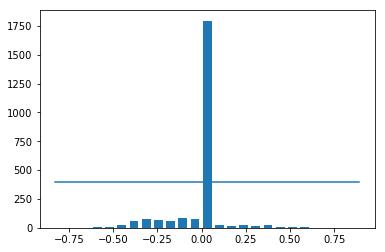

In [26]:
    num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 2371
removed: 1396
remaining: 975


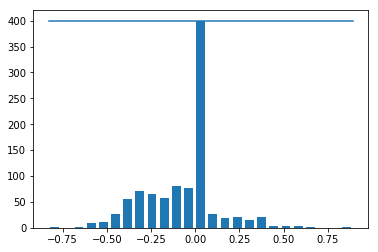

In [27]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))
 
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [28]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
 
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2021_05_10_14_26_41_738.jpg
left        left_2021_05_10_14_26_41_738.jpg  
right       right_2021_05_10_14_26_41_738.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       2.48763                           
Name: 1, dtype: object


In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 2340
Valid Samples: 585


Text(0.5, 1.0, 'Validation set')

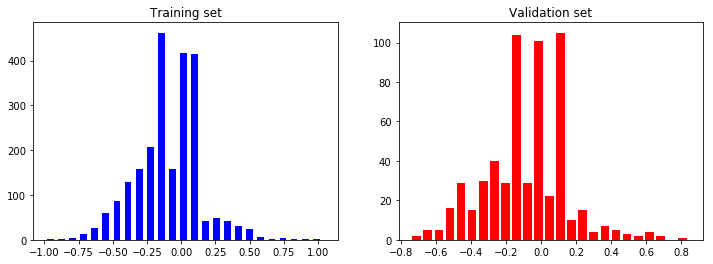

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

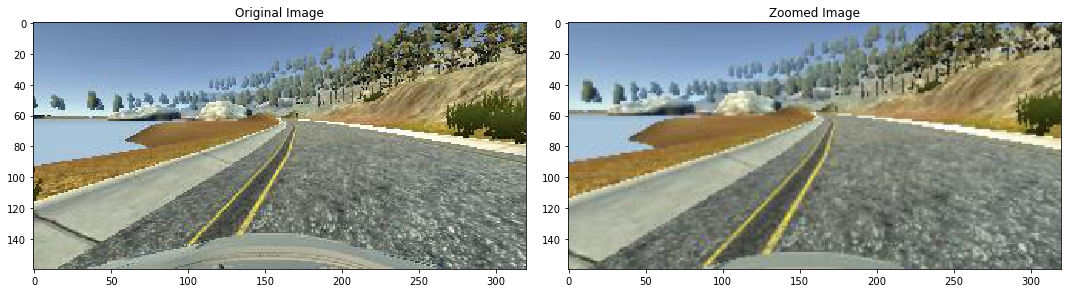

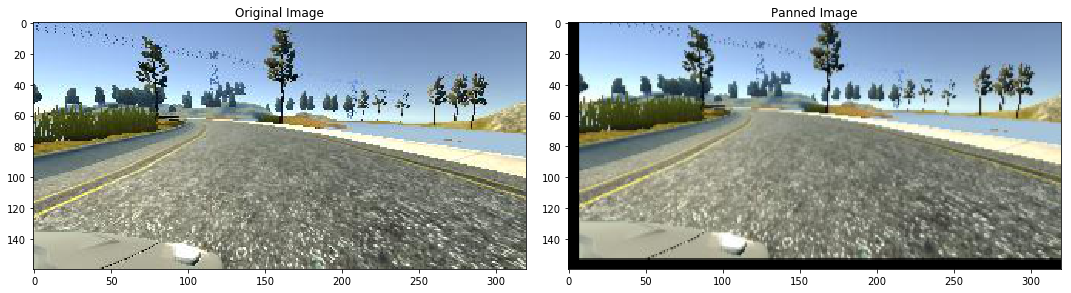

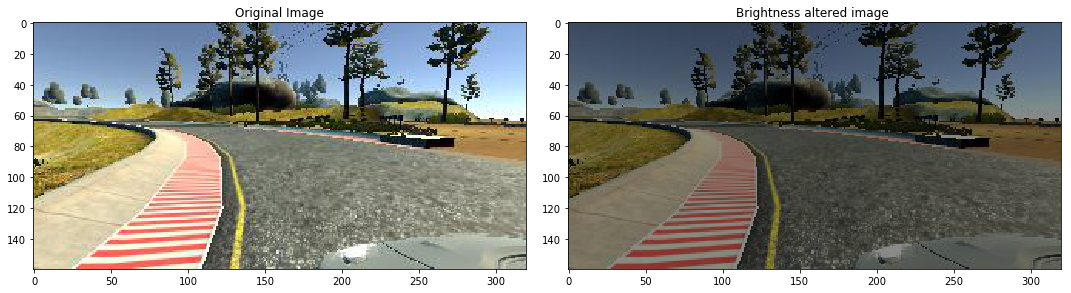

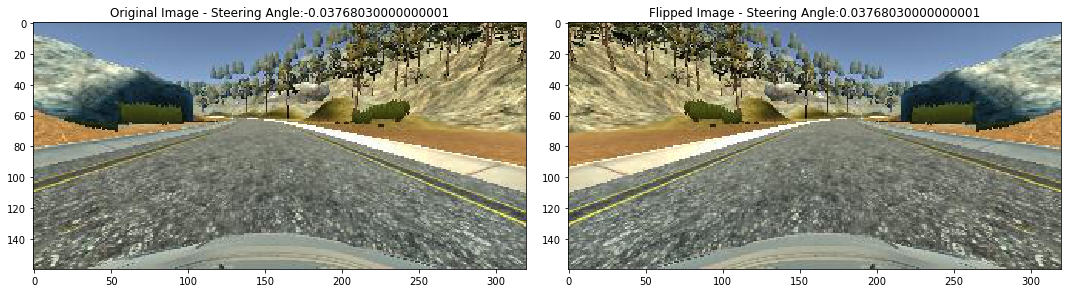

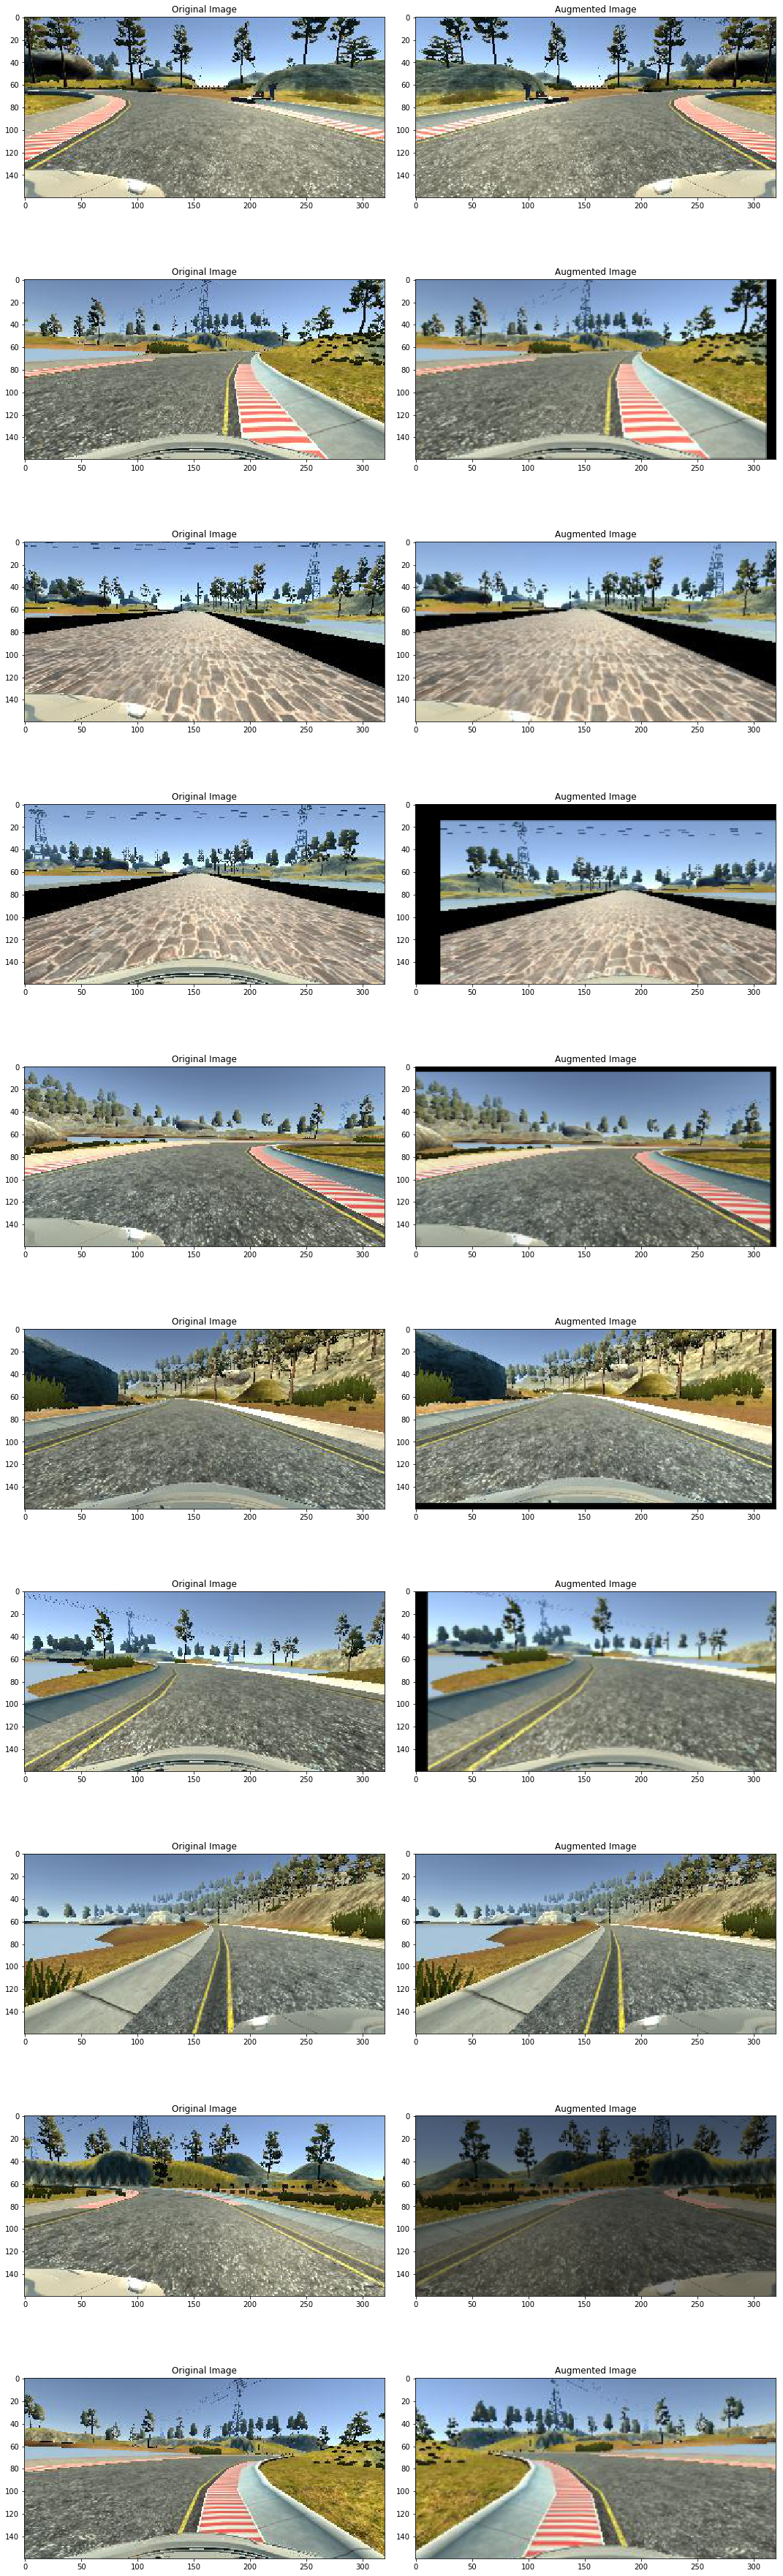

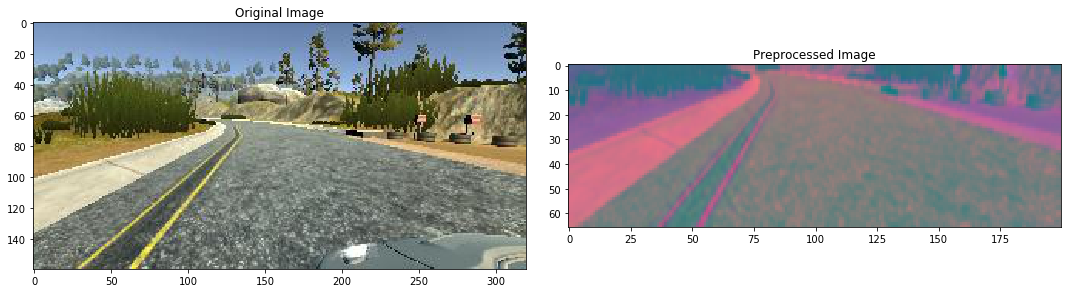

In [31]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')


def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')


def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]
 
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")
 
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

In [32]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  
  model.add(Convolution2D(64, 3, 3, activation='elu'))
#   model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))
 
  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [36]:
model = nvidia_model()
print(model.summary())
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  samples_per_epoch=300, 
                                  nb_epoch=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  nb_val_samples=200,
                                  verbose=1)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_71 (Convolution2D) (None, 31, 98, 24)    1824        convolution2d_input_15[0][0]     
____________________________________________________________________________________________________
convolution2d_72 (Convolution2D) (None, 14, 47, 36)    21636       convolution2d_71[0][0]           
____________________________________________________________________________________________________
convolution2d_73 (Convolution2D) (None, 5, 22, 48)     43248       convolution2d_72[0][0]           
____________________________________________________________________________________________________
convolution2d_74 (Convolution2D) (None, 3, 20, 64)     27712       convolution2d_73[0][0]           
___________________________________________________________________________________________

Text(0.5, 0, 'Epoch')

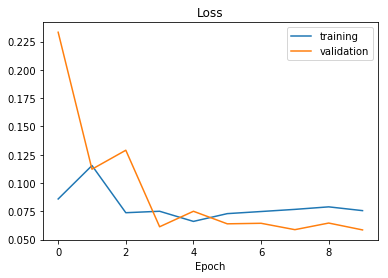

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [38]:
model.save('model.h5')

ImportError: No module named 'termios'